In [19]:
# Projet d'Analyse Exploratoire : Tendances du Marché Mondial du Jeu Vidéo
# Dataset : Kaggle (https://www.kaggle.com/datasets/anandshaw2001/video-game-sales)
# Objectif : Utilisation de Python, Pandas, Matplotlib et Seaborn

# Question 1 : Comment les ventes mondiales de jeux vidéos ont-elles évolué au fil du temps?
# Question 2 : Quels sont les genres de jeux les plus populaires (en termes de ventes) ?
# Question 3 : Quelle est la part de marvhé de chaque grande région (Amérique du Nord, Europe, Japon) ?
# Question 4 : Quelles ont été les 10 plateformes de jeu les plus réussies de tous les temps ?

# Importation des bibliothèques essentielles
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Configuration pour que les graphiques s'affichent directement dans le notebook
%matplotlib inline

print("Bibliothèques importées avec succès !")

Bibliothèques importées avec succès !


In [20]:
# Chargement et Première Inspection des Données

# Charger le jeu de données
df = pd.read_csv('vgsales.csv')

# Afficher les 5 premières lignes pour avoir un aperçu
print("--- Aperçu des 5 premières lignes ---")
print(df.head())

# Obtenir des informations générales sur le DataFrame (types, colonnes, valeurs nulles)
print("\n--- Informations générales sur le DataFrame ---")
df.info()

--- Aperçu des 5 premières lignes ---
   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  

--- Informations générales sur le DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Da

In [21]:
# Verification des Données Manquantes et où ils se trouvent

# Compter le nombre exact de valeurs manquantes pour chaque colonne
print("--- Nombre de valeurs manquantes par colonne ---")
print(df.isnull().sum())

--- Nombre de valeurs manquantes par colonne ---
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [22]:
# Nettoyage et Pré-traitement des Données
# On corrige les problèmes identifiés

# 1. Supprimer les lignes où l'année est manquante, car elles sont inutilisables pour une analyse temporelle.
df.dropna(subset=['Year'], inplace=True)

# 2. Corriger le type de la colonne 'Year' qui est en float (nombre décimal) vers un entier.
df['Year'] = df['Year'].astype(int)

# Vérifier que les changements ont bien été appliqués
print("--- Informations après nettoyage ---")
print(f"Nombre de valeurs manquantes dans 'Year' : {df['Year'].isnull().sum()}")
print(f"Type de la colonne 'Year' : {df['Year'].dtype}")

--- Informations après nettoyage ---
Nombre de valeurs manquantes dans 'Year' : 0
Type de la colonne 'Year' : int64


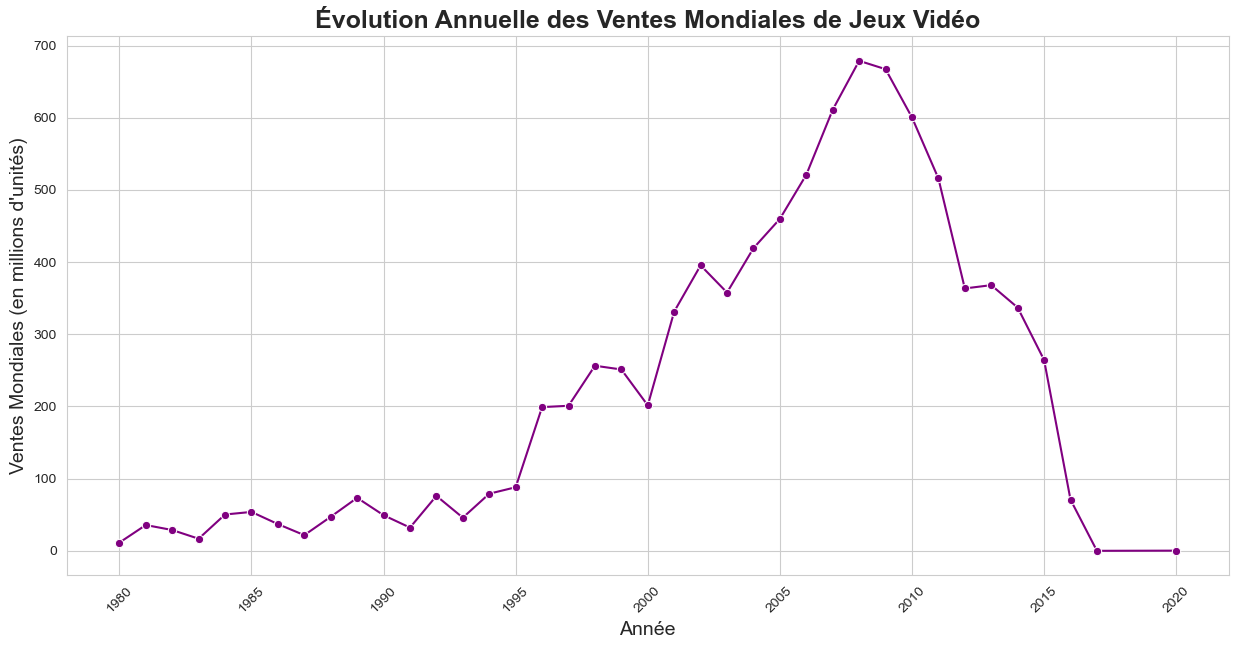

In [23]:
# Analyse et Visualisation
# Question 1 : Comment les ventes mondiales ont-elles évolué au fil du temps ?

# Regrouper les données par année et sommer les ventes mondiales
sales_by_year = df.groupby('Year')['Global_Sales'].sum().reset_index()

# Création du graphique
plt.figure(figsize=(15, 7))
sns.set_style("whitegrid")
sns.lineplot(x='Year', y='Global_Sales', data=sales_by_year, marker='o', color='purple')

plt.title('Évolution Annuelle des Ventes Mondiales de Jeux Vidéo', fontsize=18, fontweight='bold')
plt.xlabel('Année', fontsize=14)
plt.ylabel('Ventes Mondiales (en millions d\'unités)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# D'après le graphique, on remarque un pic impressionnant des ventes entre 2005 et 2011, qui est connu comme "l'âge d'or" des ventes physiques, suivi d'un déclin.

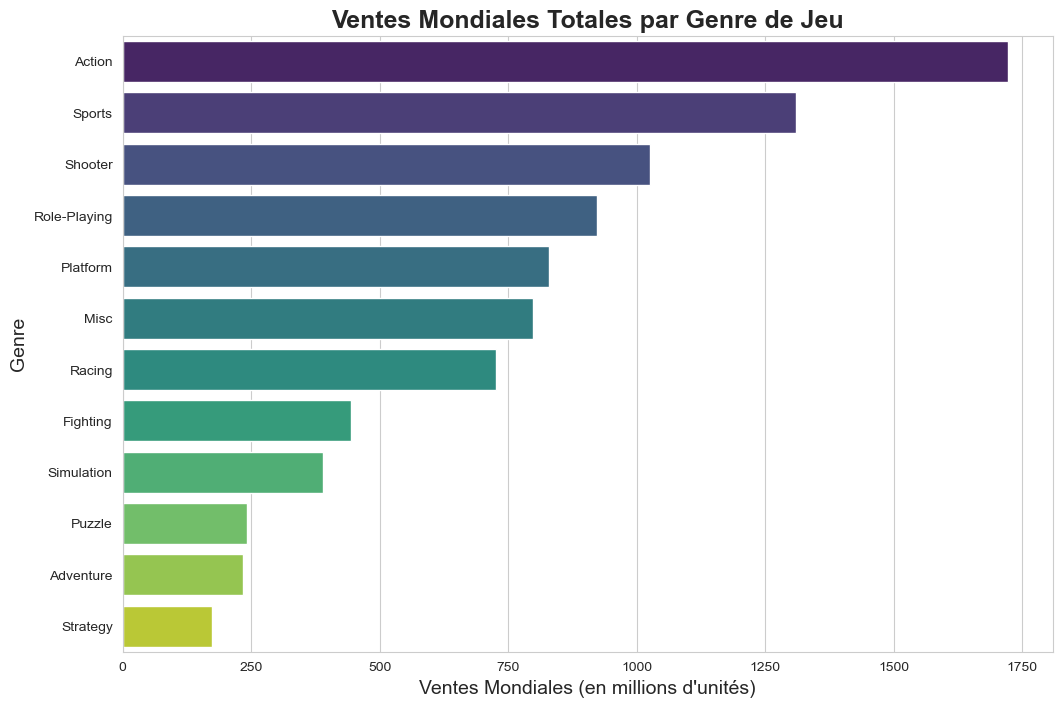

In [24]:
# Question 2 : Quels sont les genres de jeux les plus populaires?

# Regrouper les ventes par genre et les trier
sales_by_genre = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

# Création du graphique
plt.figure(figsize=(12, 8))
sns.barplot(y=sales_by_genre.index, x=sales_by_genre.values, hue=sales_by_genre.index, palette='viridis', legend=False)

plt.title('Ventes Mondiales Totales par Genre de Jeu', fontsize=18, fontweight='bold')
plt.xlabel('Ventes Mondiales (en millions d\'unités)', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.show()

# On peut voir que les jeux d'Action, de Sport et de Tir (Shooter) dominent très largement le marché.

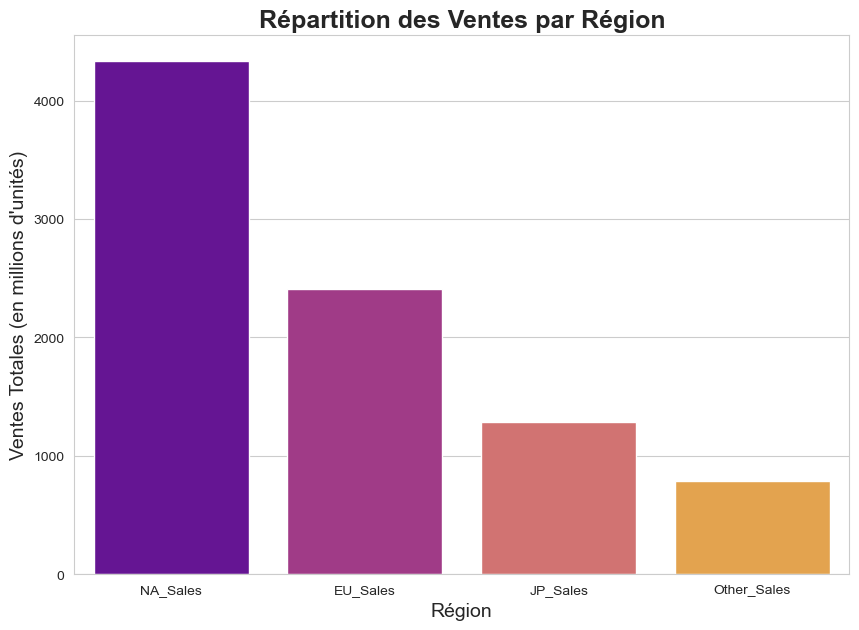

In [25]:
# Question 3 : Quelle est la répartition des ventes par grande région ?

# Calculer le total des ventes pour chaque région
total_sales_region = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()
total_sales_region.columns = ['Region', 'Total_Sales']

# Création du graphique
plt.figure(figsize=(10, 7))
sns.barplot(x=total_sales_region['Region'], y=total_sales_region['Total_Sales'], hue=total_sales_region['Region'], palette='plasma', legend=False)

plt.title('Répartition des Ventes par Région', fontsize=18, fontweight='bold')
plt.xlabel('Région', fontsize=14)
plt.ylabel('Ventes Totales (en millions d\'unités)', fontsize=14)
plt.show()

# On remarquera d'après le graphe, que le marché nord-américain est historiquement le plus grand, suivi de près par le marché européen.

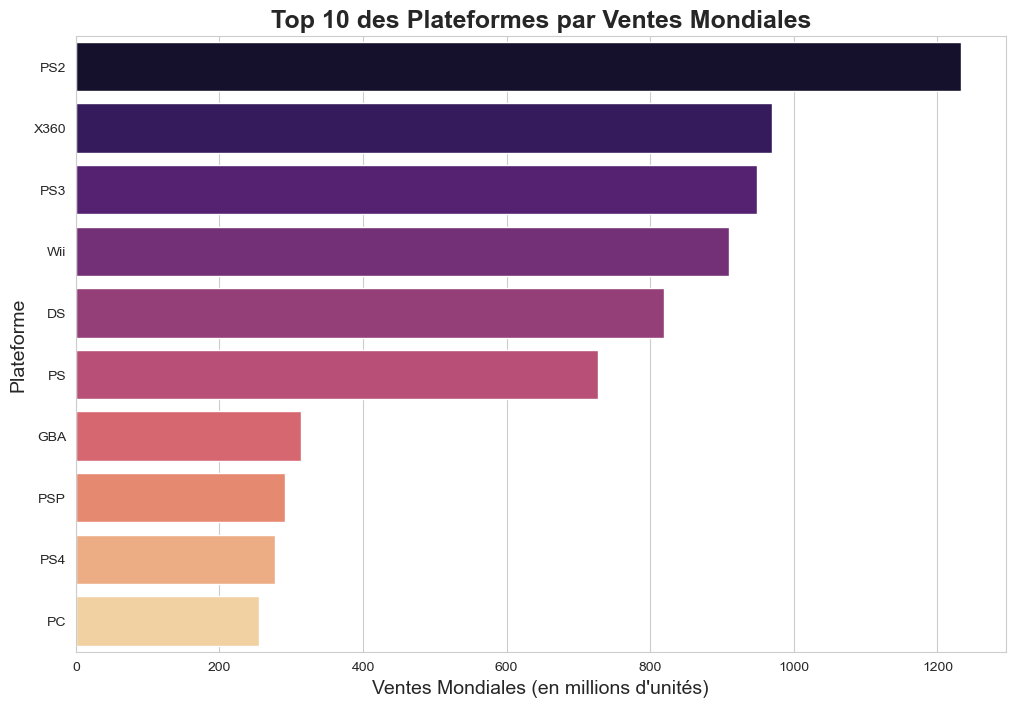

In [13]:
# Question 4 : Quelles sont les 10 plateformes les plus vendues de tous les temps ?

# Regrouper les ventes par plateforme, trier et garder le top 10
top_10_platforms = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10)

# Création du graphique
plt.figure(figsize=(12, 8))

sns.barplot(y=top_10_platforms.index, x=top_10_platforms.values, hue=top_10_platforms.index, palette='magma', legend=False)

plt.title('Top 10 des Plateformes par Ventes Mondiales', fontsize=18, fontweight='bold')
plt.xlabel('Ventes Mondiales (en millions d\'unités)', fontsize=14)
plt.ylabel('Plateforme', fontsize=14)
plt.show()

# On peut voir que la PS2, la XBOX 360, la PS3 et la Wii prennent la tête, montrant la domination de cette génération de consoles. 

In [10]:
print("--- Principales Conclusions de l'Analyse Exploratoire ---")
print("1. L'industrie du jeu vidéo (ventes physiques) a connu un 'âge d'or' spectaculaire de 2005 à 2011, avant d'entamer un déclin, probablement dû à la transition vers le numérique.")
print("2. Les genres 'Action', 'Sports' et 'Shooter' sont les plus lucratifs et dominent le marché en termes de volume de ventes.")
print("3. L'Amérique du Nord est historiquement le marché le plus important, représentant la plus grande part des ventes mondiales.")
print("4. La génération de consoles incluant la PS2, la Xbox 360, la PS3 et la Wii a été la plus réussie de l'histoire en termes de ventes de jeux.")

--- Principales Conclusions de l'Analyse Exploratoire ---
1. L'industrie du jeu vidéo (ventes physiques) a connu un 'âge d'or' spectaculaire de 2005 à 2011, avant d'entamer un déclin, probablement dû à la transition vers le numérique.
2. Les genres 'Action', 'Sports' et 'Shooter' sont les plus lucratifs et dominent le marché en termes de volume de ventes.
3. L'Amérique du Nord est historiquement le marché le plus important, représentant la plus grande part des ventes mondiales.
4. La génération de consoles incluant la PS2, la Xbox 360, la PS3 et la Wii a été la plus réussie de l'histoire en termes de ventes de jeux.
